# KNN  
Premier exemple      Bank

0) Importer les librairies classiques : numpy, pandas, seaborn et matplolib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

1) Lire le fichier Bank.csv avec pandas

In [6]:
datas = pd.read_csv('Bank.csv', sep=",")

2) Créer les 2 dataframes suivants:
- X contenant les colonnes 'age du client','montant du prêt' 
- et y contenant la colonne "défaut"

In [46]:
X = [datas.values[:, 1], datas.values[:, 2]]
Y = datas.values[:, 3]


2bis) Afficher les prêts des "bons" clients

In [40]:
bon_prets = [[X[0][i] for i in range(len(Y)) if Y[i] == 0], [X[1][i] for i in range(len(Y)) if Y[i] == 0]]
mauvais_prets = [[X[0][i] for i in range(len(Y)) if Y[i] == 1], [X[1][i] for i in range(len(Y)) if Y[i] == 1]]

print(mauvais_prets)
print(bon_prets)

[[23, 40, 60, 48, 33], [95000, 62000, 100000, 220000, 150000]]
[[25, 35, 45, 20, 35, 52], [40000, 60000, 80000, 20000, 120000, 18000]]


3) Tracer le nuage de points "montant du prêt" en fonction de "age du client", les points étant de couleurs différentes suivant leur catégorie respective dans la colonne "défaut"

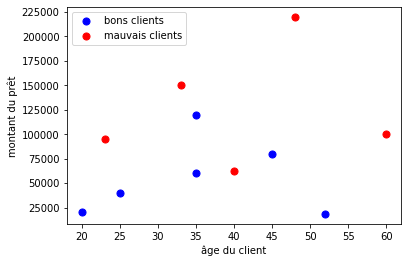

In [41]:
plt.scatter(bon_prets[0], bon_prets[1], s=50, c="blue", label="bons clients")
plt.scatter(mauvais_prets[0], mauvais_prets[1], s=50, c="red", label="mauvais clients")
plt.xlabel('âge du client')
plt.ylabel('montant du prêt')
plt.legend()
plt.show()

3bis) Placer le client ([[25,30000]]) dans la figure précédente

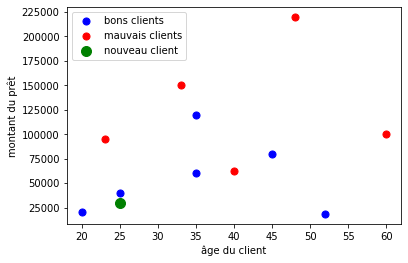

In [42]:
plt.scatter(bon_prets[0], bon_prets[1], s=50, c="blue", label="bons clients")
plt.scatter(mauvais_prets[0], mauvais_prets[1], s=50, c="red", label="mauvais clients")
plt.scatter([25], [30000], s=100, c="green", label="nouveau client")

plt.xlabel('âge du client')
plt.ylabel('montant du prêt')
plt.legend()
plt.show()

4) Entrainement et test avec l'algorithme KNN. Est ce le résutat dépend de la valeur de K? Vérifier

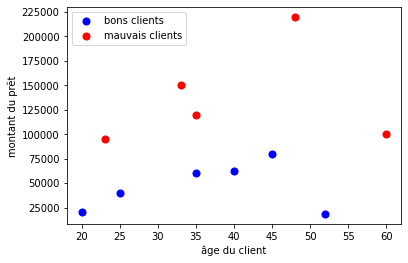

1.0

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_label = datas.values[:, 1:3]
x_train, x_test, y_train, y_test = train_test_split(X_label, Y, test_size=int(0.2*len(datas['défaut'])))

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)

y =  knn.predict(X_label)

bon_prets = [[X[0][i] for i in range(len(Y)) if y[i] == 0], [X[1][i] for i in range(len(Y)) if y[i] == 0]]
mauvais_prets = [[X[0][i] for i in range(len(Y)) if y[i] == 1], [X[1][i] for i in range(len(Y)) if y[i] == 1]]

plt.scatter(bon_prets[0], bon_prets[1], s=50, c="blue", label="bons clients")
plt.scatter(mauvais_prets[0], mauvais_prets[1], s=50, c="red", label="mauvais clients")
plt.xlabel('âge du client')
plt.ylabel('montant du prêt')
plt.legend()
plt.show()

knn.score(x_test,y_test)

